        Time  Entries  Size  avg_latency
0  129074292    10000  1000   12907.4292


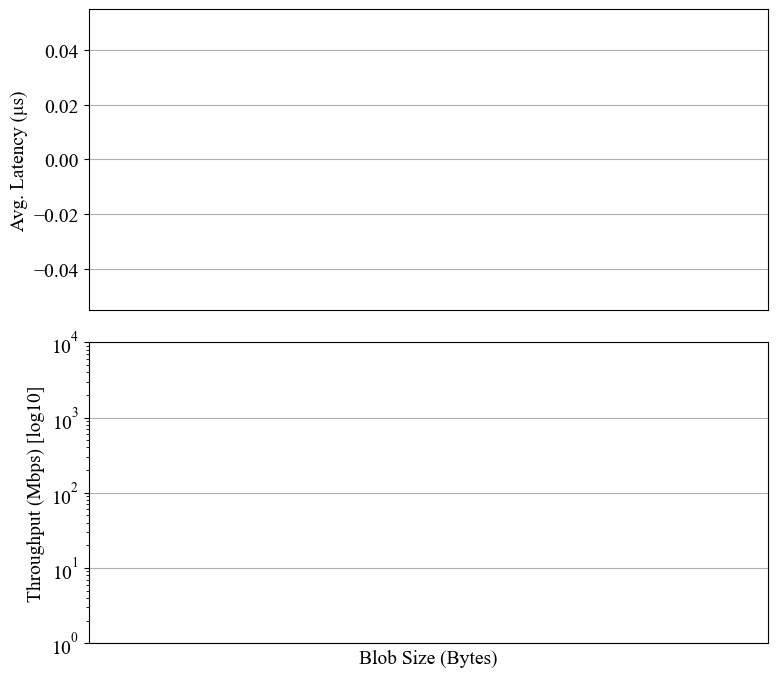

In [29]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "Times New Roman"
pd.set_option('mode.chained_assignment', None)

G = 1000000000
M = G / 1000

raw_df = pd.read_csv("../test-results/local/net_test_10000_1000.csv")
raw_df['avg_latency'] = raw_df['Time'] / raw_df['Entries']




print(raw_df)
sub_df = raw_df[['Entries', 'Size', 'Time']]
sub_df = sub_df[sub_df['Entries']==5000].groupby('Size').sum().reset_index()

sub_df['avg_latency_mics'] = sub_df['Time'] / sub_df['Entries'] / 1000
sub_df['Mb'] = sub_df['Size']*8*sub_df['Entries']/M
sub_df['Mbps'] = sub_df['Mb'] / (sub_df['Time']/G)

fig1, ax1 = plt.subplots(2, 1, sharex=True, figsize=(8,7))


labels = ['{:,}'.format(value) for value in sub_df['Size']]
ax1[0].bar(labels, 
           list(sub_df['avg_latency_mics'].values), color ='seagreen', width = 0.4, edgecolor='maroon')
ax1[0].set_ylabel(u'Avg. Latency (\u03bcs)')
ax1[1].bar(labels,list(sub_df['Mbps'].values), color ='seagreen', width = 0.4, edgecolor='maroon')
ax1[1].set_ylabel("Throughput (Mbps) [log10]")
ax1[1].set_yscale('log')
ax1[1].set_ylim([1, 10**4])
ax1[1].set_xlabel('Blob Size (Bytes)')
ax1[0].grid(axis='y')
ax1[1].grid(axis='y')
ax1[1].set_xticks(labels)
ax1[1].set_xticklabels(labels, rotation=45)


fig1.tight_layout()
fig1.savefig("../test-results/net_test.png", bbox_inches = "tight")


In [4]:
sub_df = sub_df[['Size', 'avg_latency_mics', 'Mbps']]
sub_df.rename(columns={
    'Size': 'Blob Size (Bytes)',
    'avg_latency_mics': u"Avg. Latency (\u03bcs)",
    "Mbps": "Throughput (Mbps)"
}, inplace=True)
print(sub_df.to_latex(index=False, 
                      float_format="{:,.1f}".format,
                      formatters={"Blob Size (Bytes)": "{:,}".format, "Entries": "{:,}".format}))

\begin{tabular}{rrr}
\toprule
Blob Size (Bytes) & Avg. Latency (μs) & Throughput (Mbps) \\
\midrule
\bottomrule
\end{tabular}



In [75]:
sub_df

,Blob Size (Bytes),Avg. Latency (μs),Throughput (Mbps)
0,100,23.223998,34.447127
1,500,21.171138,188.936470
2,1000,21.899897,365.298528
3,5000,33.053479,1210.160041
4,10000,54.806558,1459.679343
5,50000,91.728333,4360.702797
